# Gradient descent Algorithm Simulation

In [1]:
import numpy as np

defining the gradient descent function

In [5]:
def grad(x,y):
    n = len(x)
    m_curr = b_curr = 0
    lr = 0.001
    iteration = 1000
    for i in range(iteration):
        y_pred = m_curr * x + b_curr
        cost = 1/n * sum([val**2 for val in (y - y_pred)])
        m_der = -2/n * sum(x * (y - y_pred))
        b_der = -2/n * sum(y - y_pred)
        m_curr = m_curr - lr * m_der
        b_curr = b_curr - lr * b_der
        print(f"m = {m_curr},b = {b_curr},iteration = {iteration},cost = {cost}")

defining point

In [6]:
x = np.array([1,2,3,4,5])
y = np.array([2,4,5,4,5])
grad(x,y)

m = 0.026400000000000003,b = 0.008,iteration = 1000,cost = 17.2
m = 0.0521712,b = 0.015825600000000002,iteration = 1000,cost = 16.448037760000002
m = 0.07732848,b = 0.023480921600000003,iteration = 1000,cost = 15.731219988075521
m = 0.10188636791040001,b = 0.030969988876800005,iteration = 1000,cost = 15.047903204747364
m = 0.12585904788311042,b = 0.038296730691584006,iteration = 1000,cost = 14.396520786073076
m = 0.14926036844553248,b = 0.045464982942902174,iteration = 1000,cost = 13.775579369580624
m = 0.17210385044207335,b = 0.05247849076634318,iteration = 1000,cost = 13.183655428274745
m = 0.19440269478774969,b = 0.059340910682158056,iteration = 1000,cost = 12.619392004856152
m = 0.21616979003832626,b = 0.06605581269206724,iteration = 1000,cost = 12.081495598661483
m = 0.2374177197813307,b = 0.07262668232645315,iteration = 1000,cost = 11.568733198182144
m = 0.2581587698521827,b = 0.07905692264311226,iteration = 1000,cost = 11.0799294523542
m = 0.278404935379576,b = 0.085349856178712

# saving models

In [37]:
# selecting model
import pandas as pd
df = pd.read_csv('D:\AIML\ML\data\houseprices_many.csv')
df.bedrooms = df.bedrooms.fillna(df.bedrooms.median())

from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(df[['area','bedrooms','age']],df['price'])

LinearRegression()

In [38]:
reg.predict([[2800,2,10]])

F:\Python 3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7325421.42356675])

using pickle

In [39]:
import pickle
with open('m_pickle','wb') as f:
    pickle.dump(reg,f)

In [40]:
with open('m_pickle','rb') as f:
    m = pickle.load(f)

In [42]:
m.predict([[2800,2,10]])

F:\Python 3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7325421.42356675])

using joblib


In [43]:
import joblib
joblib.dump(reg,"m_joblib")
mj = joblib.load("m_joblib")

In [44]:
mj.predict([[2800,2,10]])

F:\Python 3.11\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([7325421.42356675])

# Polynomial Regression
Linear regression problem in nonlinear data

In [12]:
import numpy as np
x = np.array([2,3,4,5,6,7,7,8,9,11,12])
y = np.array([18,16,15,17,20,23,25,28,31,30,29])


In [13]:
print(len(x),len(y))

11 11


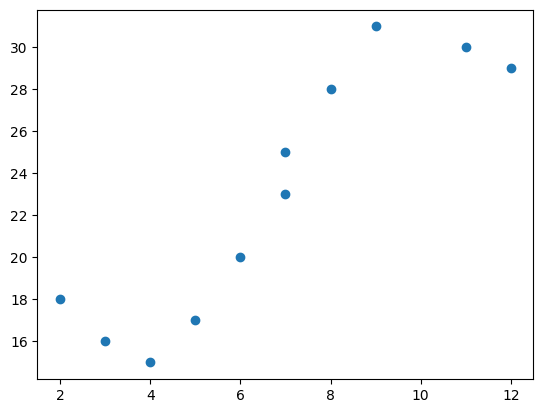

In [14]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3, random_state=0)
X_train

array([7, 3, 8, 9, 5, 2, 7])

In [19]:
X_train,X_test = X_train.reshape(-1,1),X_test.reshape(-1,1)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

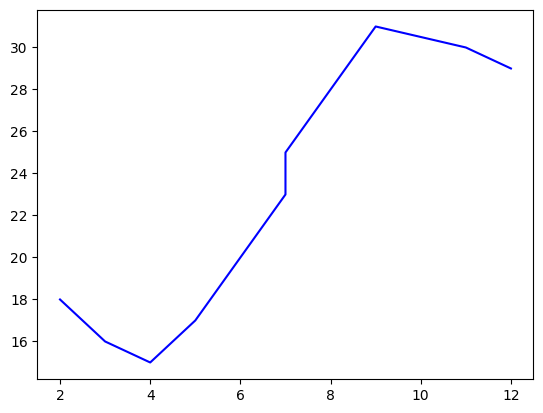

In [21]:
plt.plot(x,y,"b")

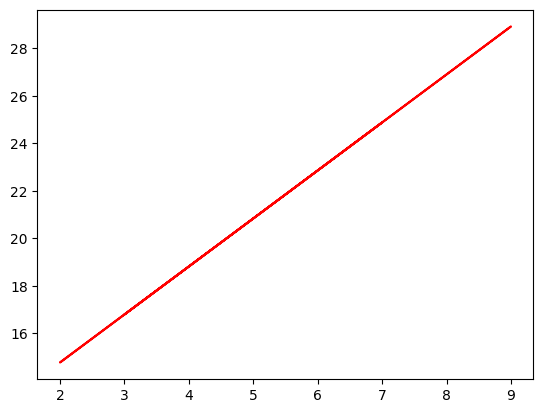

In [24]:
plt.plot(X_train,reg.predict(X_train),'r')

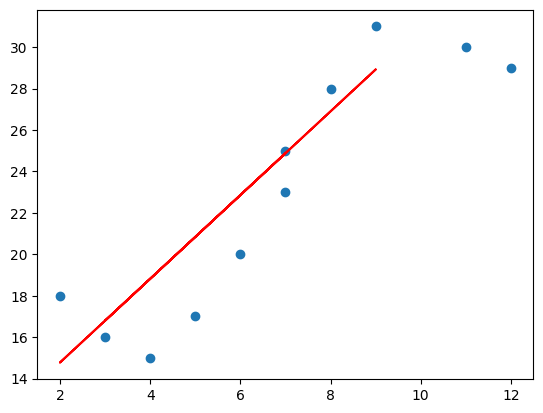

In [25]:
plt.scatter(x,y)
plt.plot(X_train,reg.predict(X_train),'r')